In [119]:
# Imports
import sys
import os
import json
import pandas as pd
import matplotlib.pyplot as plt 

In [120]:
# FEL
#path = "../FEL"
#files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".FEL.json")]
                                                                      
# FEL - KeepAligned
#path = "../subsampled_fasta_keepAligned_Results"
#files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".FEL.json")]

# FEL on Subsampling_with_TN93-Algo , used BDNF alignment not p53
#path = "../../Test_TN93_algo_subsamples"
#files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".FEL.json")]
#output_header = "BDNF_TN93Algo_FEL_AllBranches"

# FEL Internal on Subsampling_with_TN93-Algo, used BDNF alignment not p53
#path = "../../Test_TN93_algo_subsamples"
#files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".FEL_internal.json")]
#output_header = "BDNF_TN93Algo_FEL_InternalBranches"

# January 8 2022
#path = "../Results/TP53"
#files = [path + "/" + f.name for f in os.scandir(path) if f.name.endswith(".FEL.json")]
#output_header = "MESSI_TP53_FEL"

#TP53_simulations_o1
#path = "../Results/TP53_simulations_o1"
#files = [path + "/" + f.name for f in os.scandir(path) if f.name.endswith(".FEL.json")]
#output_header = "MESSI_TP53_simulations_o1_FEL"

#TP53_simulations_o01
path = "../Results/TP53_simulations_o01"
files = [path + "/" + f.name for f in os.scandir(path) if f.name.endswith(".FEL.json")]
output_header = "MESSI_TP53_simulations_o01_FEL"

#TP53_simulations_o10
#path = "../Results/TP53_simulations_o10"
#files = [path + "/" + f.name for f in os.scandir(path) if f.name.endswith(".FEL.json")]
#output_header = "MESSI_TP53_simulations_o10_FEL"

files

['../Results/TP53_simulations_o01/TP53_simulations_o01_s500_r1.replicate.1.fasta.74.subsampled.fasta.FEL.json',
 '../Results/TP53_simulations_o01/TP53_simulations_o01_s500_r1.replicate.1.fasta.185.subsampled.fasta.FEL.json',
 '../Results/TP53_simulations_o01/TP53_simulations_o01_s500_r1.replicate.1.fasta.132.subsampled.fasta.FEL.json',
 '../Results/TP53_simulations_o01/TP53_simulations_o01_s500_r1.replicate.1.fasta.145.subsampled.fasta.FEL.json',
 '../Results/TP53_simulations_o01/TP53_simulations_o01_s500_r1.replicate.1.fasta.92.subsampled.fasta.FEL.json',
 '../Results/TP53_simulations_o01/TP53_simulations_o01_s500_r1.replicate.1.fasta.25.subsampled.fasta.FEL.json',
 '../Results/TP53_simulations_o01/TP53_simulations_o01_s500_r1.replicate.1.fasta.163.subsampled.fasta.FEL.json',
 '../Results/TP53_simulations_o01/TP53_simulations_o01_s500_r1.replicate.1.fasta.114.subsampled.fasta.FEL.json',
 '../Results/TP53_simulations_o01/TP53_simulations_o01_s500_r1.replicate.1.fasta.52.subsampled.fast

In [121]:
sorted(files)

['../Results/TP53_simulations_o01/TP53_simulations_o01_s500_r1.replicate.1.fasta.10.subsampled.fasta.FEL.json',
 '../Results/TP53_simulations_o01/TP53_simulations_o01_s500_r1.replicate.1.fasta.100.subsampled.fasta.FEL.json',
 '../Results/TP53_simulations_o01/TP53_simulations_o01_s500_r1.replicate.1.fasta.101.subsampled.fasta.FEL.json',
 '../Results/TP53_simulations_o01/TP53_simulations_o01_s500_r1.replicate.1.fasta.102.subsampled.fasta.FEL.json',
 '../Results/TP53_simulations_o01/TP53_simulations_o01_s500_r1.replicate.1.fasta.103.subsampled.fasta.FEL.json',
 '../Results/TP53_simulations_o01/TP53_simulations_o01_s500_r1.replicate.1.fasta.104.subsampled.fasta.FEL.json',
 '../Results/TP53_simulations_o01/TP53_simulations_o01_s500_r1.replicate.1.fasta.105.subsampled.fasta.FEL.json',
 '../Results/TP53_simulations_o01/TP53_simulations_o01_s500_r1.replicate.1.fasta.106.subsampled.fasta.FEL.json',
 '../Results/TP53_simulations_o01/TP53_simulations_o01_s500_r1.replicate.1.fasta.107.subsampled.f

In [122]:
def return_positive_sites_count(MLE):
    global pvalue_threshold
    data_list = []
    count = 0
    for n, item in enumerate(MLE):
        if float(item[4] < pvalue_threshold): 
            #print(item)
            if float(item[0]) == 0.0:
                omega = 10000
            else:
                omega = float(item[1])/float(item[0])
            #end if
            
            if omega > 1.0:
                count += 1
                site = n + 1
                data_list.append(site)
            #end if
        #end if
    #end for
    return count, data_list
#end method

def return_negative_sites_count(MLE):
    global pvalue_threshold
    data_list = []
    count = 0
    for n, item in enumerate(MLE):
        if float(item[4] < pvalue_threshold): 
            #print(item)
            if float(item[0]) == 0.0:
                omega = 10000
            else:
                omega = float(item[1])/float(item[0])
            #end if
            
            if omega < 1.0:
                count += 1
                site = n + 1
                data_list.append(site)
            #end if
        #end if
    #end for
    return count, data_list
#end method

In [123]:
# Main -------------------------------------------------
data_dict = {}
pvalue_threshold = 0.1
count = 1
print("#, Filename, Num_Sequences, Num_Sites")
for filename in files:
    if os.stat(filename).st_size == 0: continue
        
    with open(filename, "r") as fh:
        json_data = json.load(fh)
    #end with
    
    num_seqs = json_data["input"]["number of sequences"]
    num_sites = json_data["input"]["number of sites"]
    
    print(count, filename.split("/")[-1], num_seqs, num_sites)
    
    positive_sites, positive_sites_list = return_positive_sites_count(json_data["MLE"]["content"]["0"])
    negative_sites, negative_sites_list = return_negative_sites_count(json_data["MLE"]["content"]["0"])
    
    # p-values
    p_values_list = []
    for item in json_data["MLE"]["content"]["0"]:
        p_value = item[4]
        p_values_list.append(p_value)
    #end for
    
    #data_dict[filename.split("/")[-1]] = {"num_seqs": num_seqs, "negative_sites": negative_sites, "positive_sites" : positive_sites}
    #data_dict[filename.split("/")[-1]] = {"num_seqs": num_seqs, "negative_sites": negative_sites, "positive_sites" : positive_sites}
    data_dict[count] = {"Filename":filename.split("/")[-1],
                        "num_seqs": num_seqs, 
                        "num_sites" :num_sites,
                        "negative_sites": negative_sites, 
                        "positive_sites" : positive_sites,
                        "positive_sites_list" : positive_sites_list,
                        "negative_sites_list" : negative_sites_list,
                        "p_values":p_values_list}
            
    count += 1
#end for

#, Filename, Num_Sequences, Num_Sites
1 TP53_simulations_o01_s500_r1.replicate.1.fasta.74.subsampled.fasta.FEL.json 74 500
2 TP53_simulations_o01_s500_r1.replicate.1.fasta.185.subsampled.fasta.FEL.json 185 500
3 TP53_simulations_o01_s500_r1.replicate.1.fasta.132.subsampled.fasta.FEL.json 132 500
4 TP53_simulations_o01_s500_r1.replicate.1.fasta.145.subsampled.fasta.FEL.json 145 500
5 TP53_simulations_o01_s500_r1.replicate.1.fasta.92.subsampled.fasta.FEL.json 92 500
6 TP53_simulations_o01_s500_r1.replicate.1.fasta.25.subsampled.fasta.FEL.json 25 500
7 TP53_simulations_o01_s500_r1.replicate.1.fasta.163.subsampled.fasta.FEL.json 163 500
8 TP53_simulations_o01_s500_r1.replicate.1.fasta.114.subsampled.fasta.FEL.json 114 500
9 TP53_simulations_o01_s500_r1.replicate.1.fasta.52.subsampled.fasta.FEL.json 52 500
10 TP53_simulations_o01_s500_r1.replicate.1.fasta.158.subsampled.fasta.FEL.json 158 500
11 TP53_simulations_o01_s500_r1.replicate.1.fasta.69.subsampled.fasta.FEL.json 69 500
12 TP53_simul

108 TP53_simulations_o01_s500_r1.replicate.1.fasta.136.subsampled.fasta.FEL.json 136 500
109 TP53_simulations_o01_s500_r1.replicate.1.fasta.181.subsampled.fasta.FEL.json 181 500
110 TP53_simulations_o01_s500_r1.replicate.1.fasta.70.subsampled.fasta.FEL.json 70 500
111 TP53_simulations_o01_s500_r1.replicate.1.fasta.141.subsampled.fasta.FEL.json 141 500
112 TP53_simulations_o01_s500_r1.replicate.1.fasta.167.subsampled.fasta.FEL.json 167 500
113 TP53_simulations_o01_s500_r1.replicate.1.fasta.21.subsampled.fasta.FEL.json 21 500
114 TP53_simulations_o01_s500_r1.replicate.1.fasta.96.subsampled.fasta.FEL.json 96 500
115 TP53_simulations_o01_s500_r1.replicate.1.fasta.56.subsampled.fasta.FEL.json 56 500
116 TP53_simulations_o01_s500_r1.replicate.1.fasta.110.subsampled.fasta.FEL.json 110 500
117 TP53_simulations_o01_s500_r1.replicate.1.fasta.149.subsampled.fasta.FEL.json 149 500
118 TP53_simulations_o01_s500_r1.replicate.1.fasta.189.subsampled.fasta.FEL.json 189 500
119 TP53_simulations_o01_s500

In [124]:
df = pd.DataFrame.from_dict(data_dict, orient='index')
df

,Filename,num_seqs,num_sites,negative_sites,positive_sites,positive_sites_list,negative_sites_list,p_values
1,TP53_simulations_o01_s500_r1.replicate.1.fasta...,74,500,497,0,[],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1.134711700156998e-07, 3.416461558103379e-10,..."
2,TP53_simulations_o01_s500_r1.replicate.1.fasta...,185,500,498,0,[],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1.275357153218692e-09, 1.088018564132653e-14,..."
3,TP53_simulations_o01_s500_r1.replicate.1.fasta...,132,500,498,0,[],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[5.020947246858753e-08, 1.699307361491265e-12,..."
4,TP53_simulations_o01_s500_r1.replicate.1.fasta...,145,500,499,0,[],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[2.662953124676903e-08, 1.06581410364015e-13, ..."
5,TP53_simulations_o01_s500_r1.replicate.1.fasta...,92,500,497,0,[],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[7.755710285106687e-08, 1.767208601677339e-11,..."
...,...,...,...,...,...,...,...,...
204,TP53_simulations_o01_s500_r1.replicate.1.fasta...,115,500,498,0,[],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[2.290634480983655e-07, 9.099054842920395e-12,..."
205,TP53_simulations_o01_s500_r1.replicate.1.fasta...,184,500,498,0,[],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1.278975925167458e-09, 1.06581410364015e-14, ..."
206,TP53_simulations_o01_s500_r1.replicate.1.fasta...,133,500,498,0,[],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[5.076790210445381e-08, 4.304334666471732e-13,..."
207,TP53_simulations_o01_s500_r1.replicate.1.fasta...,75,500,497,0,[],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[2.398308023288109e-07, 3.554665450877792e-10,..."


In [125]:
df.sort_values(by=['num_seqs'], ascending=True, inplace=True)
df = df.reset_index(drop=True)
df.index += 1
df

,Filename,num_seqs,num_sites,negative_sites,positive_sites,positive_sites_list,negative_sites_list,p_values
1,TP53_simulations_o01_s500_r1.replicate.1.fasta...,3,500,158,5,"[143, 234, 250, 288, 320]","[5, 8, 11, 13, 14, 18, 21, 24, 30, 33, 39, 43,...","[0.3906333224034688, 1, 0.2591688983608119, 0...."
2,TP53_simulations_o01_s500_r1.replicate.1.fasta...,4,500,196,1,[250],"[5, 6, 7, 8, 9, 11, 12, 13, 14, 17, 18, 19, 20...","[0.5401862398048206, 0.1208296632184735, 0.267..."
3,TP53_simulations_o01_s500_r1.replicate.1.fasta...,5,500,233,2,"[301, 356]","[2, 5, 6, 7, 8, 11, 12, 13, 14, 17, 18, 19, 20...","[0.5875896510759728, 0.02130304081561629, 0.23..."
4,TP53_simulations_o01_s500_r1.replicate.1.fasta...,6,500,289,1,[356],"[3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 17, 18, ...","[0.2977070208046135, 0.1200398416746071, 0.056..."
5,TP53_simulations_o01_s500_r1.replicate.1.fasta...,7,500,323,1,[356],"[2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, ...","[0.194901496489712, 0.02210250591408469, 0.045..."
...,...,...,...,...,...,...,...,...
204,TP53_simulations_o01_s500_r1.replicate.1.fasta...,206,500,498,0,[],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1.282178363481989e-09, 1.099120794378905e-14,..."
205,TP53_simulations_o01_s500_r1.replicate.1.fasta...,207,500,498,0,[],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1.284476747187568e-09, 1.088018564132653e-14,..."
206,TP53_simulations_o01_s500_r1.replicate.1.fasta...,208,500,498,0,[],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1.282543404812486e-09, 1.076916333886402e-14,..."
207,TP53_simulations_o01_s500_r1.replicate.1.fasta...,209,500,498,0,[],"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1.27270693983661e-09, 1.054711873393899e-14, ..."


In [126]:
def plot_df(df, y, tag):
    global output_header
    plt.figure()
    df.sort_values(by=['num_seqs'], ascending=False).plot(kind="line", lw=4, y=y, color="skyblue", x="num_seqs", markerfacecolor='black', marker='o', markersize=6, rot=90, figsize=(12,12))
    plt.xticks(fontsize= 20 )
    plt.yticks(fontsize= 20 )
    plt.xlabel('Number of Sequences',  fontsize=24)
    plt.ylabel('Number of Sites', fontsize=24)
    plt.savefig("../Plotting/" + output_header + tag)
    plt.ylim(ymin=0)
    plt.xlim(xmin=0)
    plt.show()
#end method


## Plots

<Figure size 432x288 with 0 Axes>

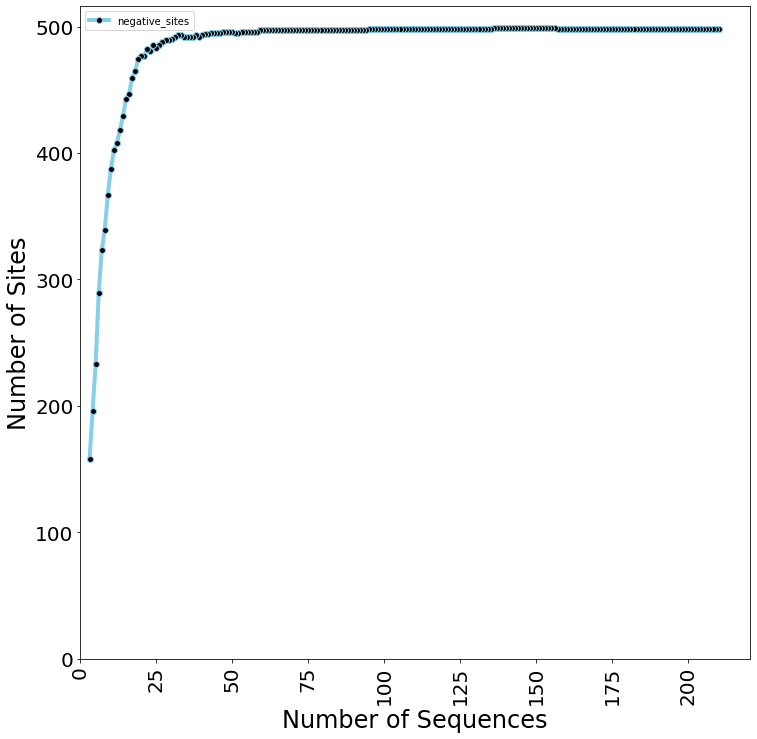

In [127]:
# df.sort_values(by=['num_seqs'], ascending=False).plot(kind="line", lw=4, y="negative_sites", x="num_seqs", markerfacecolor='black', marker='.', markersize=12, rot=90, figsize=(12,12))
plot_df(df, "negative_sites", "_NegativeSites.png")

<Figure size 432x288 with 0 Axes>

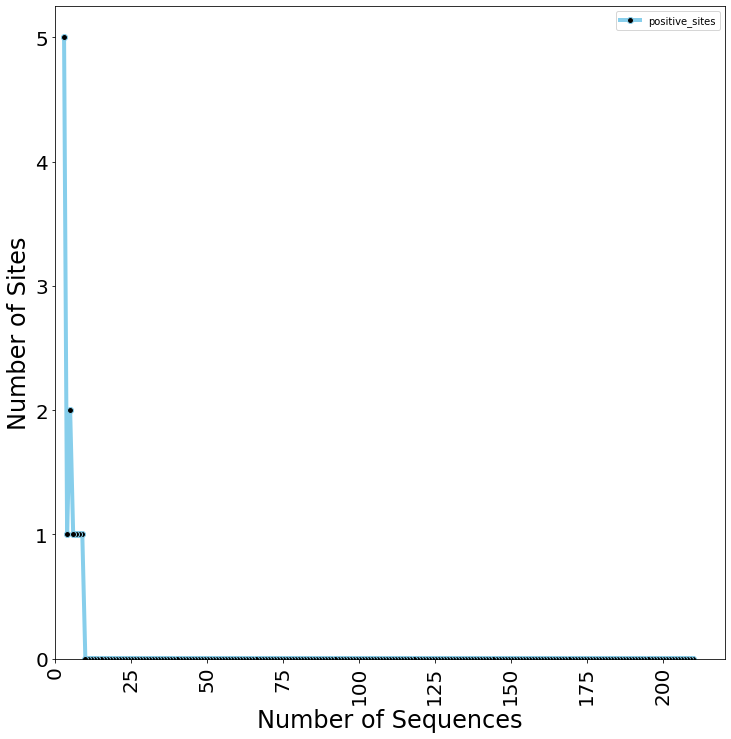

In [128]:
plot_df(df, "positive_sites", "_PositiveSites.png")